In [1]:
import torch
import torchaudio

# pytorch libs
import torch
from torch import nn
import torchaudio
import torchvision

# matplot libs
import matplotlib.pyplot as plt

# numpy
import numpy as np

# torch metrics
try:
  import torchmetrics
except:
  !pip3 -q install torchmetrics
import torchmetrics
from torchmetrics.classification import Accuracy

try:
  import torchinfo
except:
  !pip3 -q install torchinfo
finally:
  from torchinfo import summary

try:
  import torchattacks
except:
  !pip3 -qq install torchattacks
finally:
  import torchattacks

try:
  import gtts
except:
  !pip3 -qq install gtts
finally:
  import gtts

from tqdm.auto import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.9/155.9 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 12.3 MB/s eta 0:00:00


In [2]:
torchaudio.__version__,torchvision.__version__

('0.13.1+cu116', '0.14.1+cu116')

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

## Making custom Dataset NOT REQUIRED ANYMORE

In [ ]:
# downloding text files
# !wget -q -O "selcted_lines_eng.txt" "https://drive.google.com/uc?export=download&id=1xbVzVTAdhmBxOIN1iRfMdQb92VwdGx-Z"

In [ ]:
# downloding text files
# !wget -q -O "selcted_lines_hin.txt" "https://drive.google.com/uc?export=download&id=1AYlS5sk4TRdap-b54IyOlJESk8_5t5j8"

In [ ]:
# !rm -rf data/

In [ ]:
# !mkdir -p data/audio-dataset-self/gen/english/
# !mkdir -p data/audio-dataset-self/gen/hindi/
# !mkdir -p data/audio-dataset-self/ori/english/
# !mkdir -p data/audio-dataset-self/ori/hindi/

In [ ]:
# from gtts import gTTS
# from pathlib import Path

# language = 'en'
# # language = 'hi'

# # mytext = 'this is an example in english!'
# # mytext = 'यह हिंदी में एक उदाहरण है'
# Path("data/english").mkdir(parents=True, exist_ok=True)
# with open("selcted_lines_eng.txt") as fp:
#     lines = fp.readlines()
#     i=0
#     for mytext in tqdm(lines[:500]):
#         myobj = gTTS(text=mytext, lang=language, tld='co.in', slow=False)
#         myobj.save(f"data/audio-dataset-self/gen/english/{i}_female_eng.mp3")
#         # print(f"{i}/{len(lines)} done...")
#         i += 1


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
# from gtts import gTTS
# from pathlib import Path

# # language = 'en'
# language = 'hi'

# # mytext = 'this is an example in english!'
# # mytext = 'यह हिंदी में एक उदाहरण है'
# Path("data/english").mkdir(parents=True, exist_ok=True)
# with open("selcted_lines_hin.txt") as fp:
#     lines = fp.readlines()
#     i=0
#     for mytext in tqdm(lines[:500]):
#         myobj = gTTS(text=mytext, lang=language, tld='co.in', slow=False)
#         myobj.save(f"data/audio-dataset-self/gen/hindi/{i}_female_hin.mp3")
#         # print(f"{i}/{len(lines)} done...")
#         i += 1


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
# # downloading self recoreded dataset
# !wget https://www.dictate.app/annotation/record/download/data/selcted_lines_eng_20230221_171133
# !wget https://www.dictate.app/annotation/record/download/data/selcted_lines_hin_20230224_072858

In [ ]:
# # moving and extracting the data to required dirs.
# !mv selcted_lines_eng_20230221_171133 selcted_lines_eng_20230221_171133.zip
# !mv selcted_lines_hin_20230224_072858 selcted_lines_hin_20230224_072858.zip
# !mkdir -p rec/eng
# !mkdir -p rec/hin
# !unzip -q selcted_lines_eng_20230221_171133.zip -d rec/eng
# !unzip -q selcted_lines_hin_20230224_072858.zip -d rec/hin

In [ ]:
# # moving data
# !mv rec/eng/wave/* data/audio-dataset-self/ori/english/
# !mv rec/hin/wave/* data/audio-dataset-self/ori/hindi/

## Downloading self made datasete

In [4]:
id = "1T0BpspJHZ9aEDztdvVc9T5bsbIZITnz_"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1T0BpspJHZ9aEDztdvVc9T5bsbIZITnz_' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1T0BpspJHZ9aEDztdvVc9T5bsbIZITnz_" -O "data.zip" && rm -rf /tmp/cookies.txt


--2023-03-16 08:59:01--  https://docs.google.com/uc?export=download&confirm=t&id=1T0BpspJHZ9aEDztdvVc9T5bsbIZITnz_
Resolving docs.google.com (docs.google.com)... 142.251.10.113, 142.251.10.139, 142.251.10.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.10.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-0c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5erinug802r2mdmd18kbcimu97agg5nc/1678957125000/07781337784844831661/*/1T0BpspJHZ9aEDztdvVc9T5bsbIZITnz_?e=download&uuid=b3294cfe-793b-4f6a-84bf-102a15ed2769 [following]
--2023-03-16 08:59:02--  https://doc-0g-0c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5erinug802r2mdmd18kbcimu97agg5nc/1678957125000/07781337784844831661/*/1T0BpspJHZ9aEDztdvVc9T5bsbIZITnz_?e=download&uuid=b3294cfe-793b-4f6a-84bf-102a15ed2769
Resolving doc-0g-0c-docs.googleusercontent.com (doc-0g-0c-docs.googleusercontent.com)... 74.125.24.132, 2

In [5]:
!ls
!mkdir "data"
!unzip -q "data" -d "data/"

data.zip  sample_data


## Custom Dataset Class

### generating csv file

In [7]:
# gen. csv file custom dataset class
import pandas as pd
from pathlib import Path
import os

# data dir
data_dir = Path('./data/audio-dataset-self/')

# englist data dir
eng_ori = data_dir / 'ori' / 'english'
eng_gen = data_dir / 'gen' / 'english'


# hindi data dir
hin_ori = data_dir / 'ori' / 'hindi'
hin_gen = data_dir / 'gen' / 'hindi'


# complete data lists
englist_data = list(eng_gen.glob('*.wav')) + list(eng_ori.glob('*.wav'))
hindi_data = list(hin_gen.glob('*.wav')) + list(hin_ori.glob('*.wav'))

print(len(englist_data),len(hindi_data))
# print(englist_data[1])

# data frame to be saved
data_frame_dict = {
    "name": [],
    "lang": [],
    "type": [],
    "path": []
}

# processed data list
for sound in englist_data:
    path = sound
    sound = str(sound).split("/")
    # print(sound)
    data_frame_dict["name"].append(sound[4])
    data_frame_dict["lang"].append(sound[3])
    data_frame_dict["type"].append(sound[2])
    data_frame_dict["path"].append(path)

for sound in hindi_data:
    path = sound
    sound = str(sound).split("/")
    # print(sound)
    data_frame_dict["name"].append(sound[4])
    data_frame_dict["lang"].append(sound[3])
    data_frame_dict["type"].append(sound[2])
    data_frame_dict["path"].append(path)
    
# writing the dataframe to csv
df = pd.DataFrame(data_frame_dict)
df.to_csv(str(data_dir)+"/data.csv",index=False)
print(f"CSV File Saved to: {str(data_dir)}/data.csv")

2000 2000
CSV File Saved to: data/audio-dataset-self/data.csv


### defining custom class

In [8]:
# Custom dataset class
import os
from torch.utils.data import Dataset
import pandas as pd

class SelfAudoDataset(Dataset):
    def __init__(self,
                 file_csv:str,
                 audio_dir:str,
                 transformation:torchaudio.transforms,
                 target_sample_rate:int,
                 num_samples:int,
                 device:str
                 ) -> None:
        super().__init__()
        self.file_csv = pd.read_csv(file_csv)
        self.audio_dir = audio_dir
        self.device = device
        self.transformation = transformation.to(self.device)
        self.target_sample_rate = target_sample_rate
        self.num_samples = num_samples
    
    def __len__(self):
        return len(self.file_csv)

    def __getitem__(self, index):
        audio_sample_path = self._get_audio_sample_path(index)
        label = self._get_audio_sample_label(index)
        # print(audio_sample_path,label)
        signal, sr = torchaudio.load(audio_sample_path)
        
        signal = signal.to(self.device)
        signal = self._resample_if_necessary(signal, sr)
        signal = self._mix_down_if_necessary(signal)
        signal = self._cut_if_necessary(signal)
        signal = self._right_pad_if_necessary(signal)
        signal = self.transformation(signal)
        return signal, label

    def _cut_if_necessary(self, signal):
        if signal.shape[1] > self.num_samples:
            signal = signal[:, :self.num_samples]
        return signal

    def _right_pad_if_necessary(self, signal):
        length_signal = signal.shape[1]
        if length_signal < self.num_samples:
            num_missing_samples = self.num_samples - length_signal
            last_dim_padding = (0, num_missing_samples)
            signal = torch.nn.functional.pad(signal, last_dim_padding)
        return signal

    def _resample_if_necessary(self, signal, sr):
        if sr != self.target_sample_rate:
            resampler = torchaudio.transforms.Resample(sr, self.target_sample_rate).to(device)
            signal = resampler(signal)
        return signal

    def _mix_down_if_necessary(self, signal):
        if signal.shape[0] > 1:
            signal = torch.mean(signal, dim=0, keepdim=True)
        return signal

    def _get_audio_sample_path(self, index):
        path = self.file_csv.iloc[index,3]
        return path

    def _get_audio_sample_label(self, index):
        return 0 if self.file_csv.iloc[index, 2] == 'gen' else 1

In [9]:
CSV_FILE = "./data/audio-dataset-self/data.csv"
AUDIO_DIR = "./data/audio-dataset-self/"
SAMPLE_RATE = 22050
# NUM_SAMPLES = 22050*4
NUM_SAMPLES = 64600

mel_spectrogram = torchaudio.transforms.MelSpectrogram(
        sample_rate=SAMPLE_RATE,
        n_fft=1024,
        hop_length=512,
        n_mels=64
)

SAD = SelfAudoDataset(
    file_csv=CSV_FILE,
    audio_dir=AUDIO_DIR,
    transformation=mel_spectrogram,
    target_sample_rate=SAMPLE_RATE,
    num_samples=NUM_SAMPLES,
    device=device
)

print(f"There are {len(SAD)} samples in the dataset.")
signal, label = SAD[0]
signal.shape,label

There are 4000 samples in the dataset.


(torch.Size([1, 64, 127]), 0)

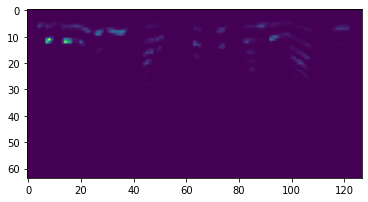

In [ ]:
plt.imshow(signal.cpu().squeeze().numpy())
plt.show()

In [ ]:
BATCH_SIZE = 16
test_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(SAD)
indices = np.arange(dataset_size)
split = int(np.floor(test_split * dataset_size))

if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)

train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
valid_sampler = torch.utils.data.SubsetRandomSampler(val_indices)

train_dataloader = torch.utils.data.DataLoader(SAD, batch_size=BATCH_SIZE, 
                                           sampler=train_sampler)
test_dataloader = torch.utils.data.DataLoader(SAD, batch_size=BATCH_SIZE,
                                                sampler=valid_sampler)
len(train_dataloader),len(test_dataloader)

(200, 50)

In [ ]:
def training_step(
    model: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: nn.Module,
    acc_fn: torchmetrics.classification.accuracy.MulticlassAccuracy,
    optimizer: torch.optim.Optimizer,
    device: str,
):
    """
    Desc:
      funtion to perform traning step for one EPOCH

    Args:
      model (nn.Module): Pytorch model class object
      dataloader (torch.utils.data.DataLoader): training dataloder from training dataset
      loss_fn (nn.Module): Loss Function (object) of your choice
      acc_fn (torchmetrics.classification.accuracy.MulticlassAccuracy): accuracy function from trochmetrics
      optimizer (torch.optim.Optimizer): Optimizer Function (object) of your choice
      device (str): Torch Device "CPU/GPU"
    Returns:
      train_loss (float), train_acc (float): training loss and training accuracy for one EPOCH
    """
    model.train()  # putting model in traing model

    train_loss, train_acc = 0, 0  # initlizing loss and acc. for the epoch

    # print(type(model.parameters()))
    for (X, y) in dataloader:  # loop in batches
        # model_parms_before_forward_pass = np.array([x.detach().numpy() for x in model.parameters()].copy())
        X, y = X.to(device), y.to(device)  # sending the data to target device
        # print(f"shape of X: {X.shape}, shape of y: {y.shape}")
        
        # 1. forward pass
        y_pred_logits = model(X,False).squeeze()

        # print(y_pred_logits,y)

        
        loss = loss_fn(y_pred_logits, y)
        train_loss += loss.item()

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backword
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # model_parms_after_forward_pass = np.array([x.detach().numpy() for x in model.parameters()])
        # print("Model parms diff:")
        # print([(i,j) for (i,j) in zip(iter(model_parms_after_forward_pass),iter(model_parms_before_forward_pass))])
        # print(model_parms_after_forward_pass - model_parms_before_forward_pass,sep="\n")
        train_acc += acc_fn(y_pred_logits.argmax(dim=1), y).item()

    # 6. returning actual loss and acc.x
    return train_loss / len(dataloader), train_acc / len(dataloader)

In [ ]:
def testing_step(
    model: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: nn.Module,
    acc_fn: torchmetrics.classification.accuracy.MulticlassAccuracy,
    device: str,
):
    """
    Desc:
      funtion to perform testing step for one EPOCH

    Args:
      model (nn.Module): Pytorch model class object
      dataloader (torch.utils.data.DataLoader): testing dataloder from training dataset
      loss_fn (nn.Module): Loss Function (object) of your choice
      acc_fn (torchmetrics.classification.accuracy.MulticlassAccuracy): accuracy function from trochmetrics
      device (str): Torch Device "CPU/GPU"
    Returns:
      test_loss (float), test_acc (float): testing loss and testing accuracy for one EPOCH
    """
    model.eval()  # putting model in eval model

    test_loss, test_acc = 0, 0  # initlizing loss and acc. for the epoch

    # with torch.inference_mode(): # disabling inference mode for aqcuiring gradients of perturbed data
    for (X, y) in dataloader:  # loop in batches
        X, y = X.to(device), y.to(device)  # sending the data to target device
        # print(f"shape of X: {X.shape}, shape of y: {y.shape}")

        # 1. forward pass
        y_pred_logits = model(X,False).squeeze()

        # 2. calculate the loss
        loss = loss_fn(y_pred_logits, y)
        test_loss += loss.item()

        # printing the prediction and actual label
        # print(y_pred_logits.argmax(dim=1), y,sep='\n')
        
        # 3. calculating accuracy
        test_acc += acc_fn(y_pred_logits.argmax(dim=1), y).item()

    # 6. returning actual loss and acc.
    return test_loss / len(dataloader), test_acc / len(dataloader)

In [ ]:
from tqdm.auto import tqdm


def train(
    model: nn.Module,
    train_dataloader: torch.utils.data.DataLoader,
    test_dataloader: torch.utils.data.DataLoader,
    loss_fn: nn.Module,
    acc_fn: torchmetrics.classification.accuracy.MulticlassAccuracy,
    optimizer: torch.optim.Optimizer,
    epochs: int
):
    """
    Desc:
      funtion to perform training for one {epochs} param

    Args:
      model (nn.Module): Pytorch model class object
      train_dataloader (torch.utils.data.DataLoader): training dataloder from training dataset
      test_dataloader (torch.utils.data.DataLoader): testing dataloder from testing dataset
      loss_fn (nn.Module): Loss Function (object) of your choice
      acc_fn (torchmetrics.classification.accuracy.MulticlassAccuracy): accuracy function from trochmetrics
      device (str): Torch Device "CPU/GPU"
      epochs (int): number of epochs to train the model
    Returns:
      result_dict ({str: List[float]}): testing loss and testing accuracy for one EPOCH
    """
    # 1. init. result dict
    result_dict = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

    # 2. loop in range epochs performs train and test steps on the model
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = training_step(
            model=model,
            dataloader=train_dataloader,
            loss_fn=loss_fn,
            acc_fn=acc_fn,
            optimizer=optimizer,
            device=device,
        )

        test_loss, test_acc = testing_step(
            model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            acc_fn=acc_fn,
            device=device,
        )

        # 3. print out results
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 4. adding results to result_dict
        result_dict["train_loss"].append(train_loss)
        result_dict["train_acc"].append(train_acc)
        result_dict["test_loss"].append(test_loss)
        result_dict["test_acc"].append(test_acc)

    # 5. return result dict
    return result_dict


## Model With Pre-Trained

In [ ]:
vgg_weigths = torchvision.models.VGG11_Weights.DEFAULT
auto_tranform = vgg_weigths.transforms()
audio_detection_model = torchvision.models.vgg11(weights=vgg_weigths)

In [ ]:
summary(audio_detection_model, [32,3, 64, 173],col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
VGG (VGG)                                [32, 3, 64, 173]     [32, 1000]           --                   True
├─Sequential (features)                  [32, 3, 64, 173]     [32, 512, 2, 5]      --                   True
│    └─Conv2d (0)                        [32, 3, 64, 173]     [32, 64, 64, 173]    1,792                True
│    └─ReLU (1)                          [32, 64, 64, 173]    [32, 64, 64, 173]    --                   --
│    └─MaxPool2d (2)                     [32, 64, 64, 173]    [32, 64, 32, 86]     --                   --
│    └─Conv2d (3)                        [32, 64, 32, 86]     [32, 128, 32, 86]    73,856               True
│    └─ReLU (4)                          [32, 128, 32, 86]    [32, 128, 32, 86]    --                   --
│    └─MaxPool2d (5)                     [32, 128, 32, 86]    [32, 128, 16, 43]    --                   --
│    └─Conv2d (6)     

In [ ]:
audio_detection_model.features[0] = nn.Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)).to(device)
for parms in audio_detection_model.parameters():
  parms.requires_grad = False


audio_detection_model.classifier = nn.Sequential(
    nn.Linear(in_features=25088, out_features=4096),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=4096, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=4096, out_features=2, bias=True)
).to(device)

In [ ]:
summary(model=audio_detection_model, 
        input_size=(32, 1, 64, 173), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
VGG (VGG)                                [32, 1, 64, 173]     [32, 2]              --                   Partial
├─Sequential (features)                  [32, 1, 64, 173]     [32, 512, 2, 5]      --                   False
│    └─Conv2d (0)                        [32, 1, 64, 173]     [32, 64, 64, 173]    (640)                False
│    └─ReLU (1)                          [32, 64, 64, 173]    [32, 64, 64, 173]    --                   --
│    └─MaxPool2d (2)                     [32, 64, 64, 173]    [32, 64, 32, 86]     --                   --
│    └─Conv2d (3)                        [32, 64, 32, 86]     [32, 128, 32, 86]    (73,856)             False
│    └─ReLU (4)                          [32, 128, 32, 86]    [32, 128, 32, 86]    --                   --
│    └─MaxPool2d (5)                     [32, 128, 32, 86]    [32, 128, 16, 43]    --                   --
│    └─Conv2d (6

In [ ]:
loss = nn.BCEWithLogitsLoss()
input = torch.randn(3, requires_grad=True)
target = torch.empty(3).random_(2)
print(input,target)
output = loss(input, target)
output.backward()

tensor([-1.9476,  0.9246, -0.8949], requires_grad=True) tensor([0., 0., 0.])


In [ ]:
LEARNING_RATE = 0.001
EPOCHS = 10


# initialise loss funtion + optimiser
loss_fn = nn.CrossEntropyLoss()
acc_fn = torchmetrics.Accuracy(task="multiclass",num_classes=2).to(device)
optimiser = torch.optim.Adam(audio_detection_model.parameters(),
                              lr=LEARNING_RATE)

# train model
audio_detection_model_results = train(
    model = audio_detection_model,
    train_dataloader = train_dataloader,
    test_dataloader = test_dataloader,
    loss_fn = loss_fn,
    acc_fn = acc_fn,
    optimizer = optimiser,
    epochs = EPOCHS
)

# save model
torch.save(audio_detection_model.state_dict(), "model_pre_trained.pth")
print("Trained feed forward net saved at model_pre_trained.pth")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 53.9074 | train_acc: 0.9081 | test_loss: 42.5900 | test_acc: 0.9075
Epoch: 2 | train_loss: 20.1229 | train_acc: 0.9522 | test_loss: 4.0608 | test_acc: 0.9738
Epoch: 3 | train_loss: 3.9477 | train_acc: 0.9759 | test_loss: 0.9426 | test_acc: 0.9938
Epoch: 4 | train_loss: 25.0096 | train_acc: 0.9628 | test_loss: 50.8121 | test_acc: 0.9750
Epoch: 5 | train_loss: 86.8253 | train_acc: 0.9544 | test_loss: 16.2660 | test_acc: 0.9938
Epoch: 6 | train_loss: 27.7979 | train_acc: 0.9822 | test_loss: 1.1427 | test_acc: 0.9962
Epoch: 7 | train_loss: 10.8485 | train_acc: 0.9850 | test_loss: 3.0007 | test_acc: 0.9888
Epoch: 8 | train_loss: 5.0821 | train_acc: 0.9888 | test_loss: 19.8806 | test_acc: 0.9688
Epoch: 9 | train_loss: 3.6336 | train_acc: 0.9866 | test_loss: 1.4706 | test_acc: 0.9975
Epoch: 10 | train_loss: 1.4425 | train_acc: 0.9931 | test_loss: 1.7719 | test_acc: 0.9888
Trained feed forward net saved at feedforwardnet.pth


## Model Without Pre-Trained

In [13]:
class CNNNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        # 4 conv blocks / flatten / linear / softmax
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=64,
                out_channels=128,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(128* 5* 9, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_data):
        x = self.conv1(input_data)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        # print(x.shape)
        x = self.flatten(x)
        logits = self.linear(x)
        predictions = self.softmax(logits)
        return predictions

In [14]:
model = CNNNetwork().to(device)

In [ ]:
LEARNING_RATE = 0.01
EPOCHS = 10


# initialise loss funtion + optimiser
loss_fn = nn.CrossEntropyLoss()
acc_fn = torchmetrics.Accuracy(task="multiclass",num_classes=2).to(device)
optimiser = torch.optim.Adam(model.parameters(),
                              lr=LEARNING_RATE)

# train model
model_results = train(
    model = model,
    train_dataloader = train_dataloader,
    test_dataloader = test_dataloader,
    loss_fn = loss_fn,
    acc_fn = acc_fn,
    optimizer = optimiser,
    epochs = EPOCHS
)

# save model
torch.save(model.state_dict(), "model_custom_cnn_arch.pth")
print("Trained feed forward net saved at model_custom_cnn_arch.pth")


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8077 | train_acc: 0.5056 | test_loss: 0.8095 | test_acc: 0.5038
Epoch: 2 | train_loss: 0.8079 | train_acc: 0.5053 | test_loss: 0.8095 | test_acc: 0.5038
Epoch: 3 | train_loss: 0.8079 | train_acc: 0.5053 | test_loss: 0.8095 | test_acc: 0.5038
Epoch: 4 | train_loss: 0.8079 | train_acc: 0.5053 | test_loss: 0.8095 | test_acc: 0.5038
Epoch: 5 | train_loss: 0.8079 | train_acc: 0.5053 | test_loss: 0.8095 | test_acc: 0.5038
Epoch: 6 | train_loss: 0.8079 | train_acc: 0.5053 | test_loss: 0.8095 | test_acc: 0.5038
Epoch: 7 | train_loss: 0.8079 | train_acc: 0.5053 | test_loss: 0.8095 | test_acc: 0.5038
Epoch: 8 | train_loss: 0.8079 | train_acc: 0.5053 | test_loss: 0.8095 | test_acc: 0.5038
Epoch: 9 | train_loss: 0.8079 | train_acc: 0.5053 | test_loss: 0.8095 | test_acc: 0.5038
Epoch: 10 | train_loss: 0.8079 | train_acc: 0.5053 | test_loss: 0.8095 | test_acc: 0.5038
Trained feed forward net saved at feedforwardnet.pth
